# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [27]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [28]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [29]:
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']

tips['log_net_bill'] = np.log(tips['net_bill'])

X = sm.add_constant(tips['log_net_bill'])  # Adiciona intercepto
y = tips['tip_pct']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.62e-13
Time:                        10:59:20   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6181      0.054     11.444   

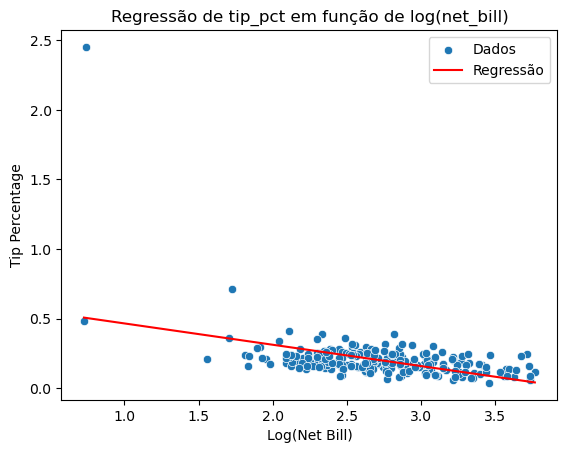

In [30]:
sns.scatterplot(x='log_net_bill', y='tip_pct', data=tips, label='Dados')

x_vals = np.linspace(tips['log_net_bill'].min(), tips['log_net_bill'].max(), 100)
y_vals = model.predict(sm.add_constant(x_vals))
plt.plot(x_vals, y_vals, color='red', label='Regressão')

plt.xlabel('Log(Net Bill)')
plt.ylabel('Tip Percentage')
plt.title('Regressão de tip_pct em função de log(net_bill)')
plt.legend()
plt.show()

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [31]:
tips['net_bill_squared'] = tips['net_bill'] ** 2

X = tips[['net_bill', 'net_bill_squared']]
X = sm.add_constant(X)  # adiciona o intercepto
y = tips['tip_pct']

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.06e-09
Time:                        10:59:21   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4851      0.047  

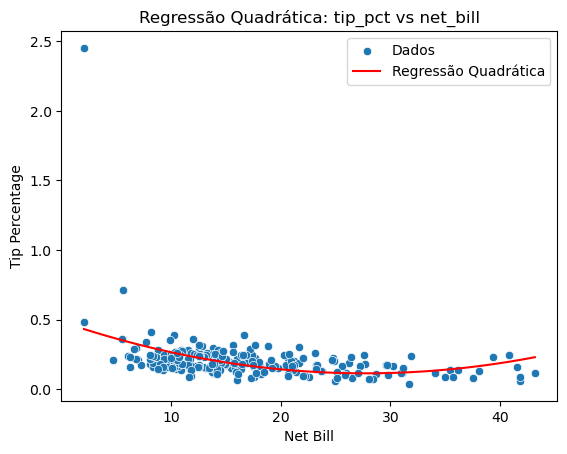

In [32]:
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, label='Dados')

x_vals = np.linspace(tips['net_bill'].min(), tips['net_bill'].max(), 100)
x_plot = np.column_stack((x_vals, x_vals**2))
x_plot = sm.add_constant(x_plot)
y_vals = model.predict(x_plot)

plt.plot(x_vals, y_vals, color='red', label='Regressão Quadrática')

plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.title('Regressão Quadrática: tip_pct vs net_bill')
plt.legend()
plt.show()


###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [38]:
tips['log_tip_pct'] = np.log(tips['tip_pct'])

X = sm.add_constant(tips['net_bill'])  # Adiciona intercepto
y = tips['log_tip_pct']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           8.27e-16
Time:                        11:01:38   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2749      0.056    -22.872      0.0

In [39]:
tips['log_predicted'] = model.predict(X)

tips['tip_pct_predicted'] = np.exp(tips['log_predicted'])

tips['residual'] = tips['tip_pct'] - tips['tip_pct_predicted']

print(tips[['tip_pct', 'tip_pct_predicted', 'residual']].head())

    tip_pct  tip_pct_predicted  residual
0  0.063204           0.184874 -0.121670
1  0.191244           0.223283 -0.032038
2  0.199886           0.177702  0.022183
3  0.162494           0.165035 -0.002541
4  0.172069           0.162452  0.009617


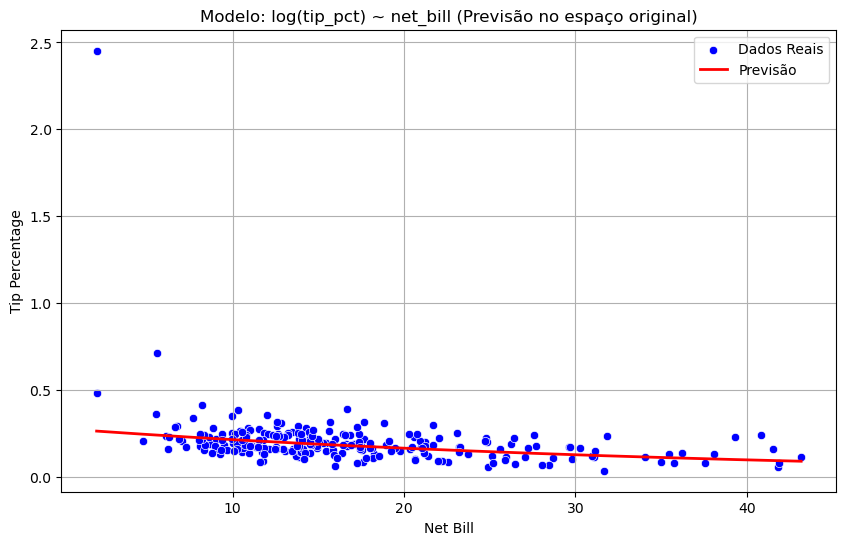

In [40]:

plt.figure(figsize=(10,6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, label='Dados Reais', color='blue')

tips_sorted = tips.sort_values('net_bill')
plt.plot(tips_sorted['net_bill'], tips_sorted['tip_pct_predicted'], color='red', label='Previsão', linewidth=2)

plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.title('Modelo: log(tip_pct) ~ net_bill (Previsão no espaço original)')
plt.legend()
plt.grid(True)
plt.show()


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [41]:
tips['log_net_bill'] = np.log(tips['net_bill'])
tips['log_tip_pct'] = np.log(tips['tip_pct'])

X = sm.add_constant(tips['log_net_bill'])  # adiciona intercepto
y = tips['log_tip_pct']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           5.20e-20
Time:                        11:02:25   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3942      0.133     -2.961   

In [43]:
tips['log_predicted'] = model.predict(X)

tips['tip_pct_predicted'] = np.exp(tips['log_predicted'])

tips['residual'] = tips['tip_pct'] - tips['tip_pct_predicted']

print(tips[['tip_pct', 'tip_pct_predicted', 'residual']].head())


    tip_pct  tip_pct_predicted  residual
0  0.063204           0.175876 -0.112672
1  0.191244           0.236442 -0.045197
2  0.199886           0.168249  0.031637
3  0.162494           0.156348  0.006145
4  0.172069           0.154127  0.017941


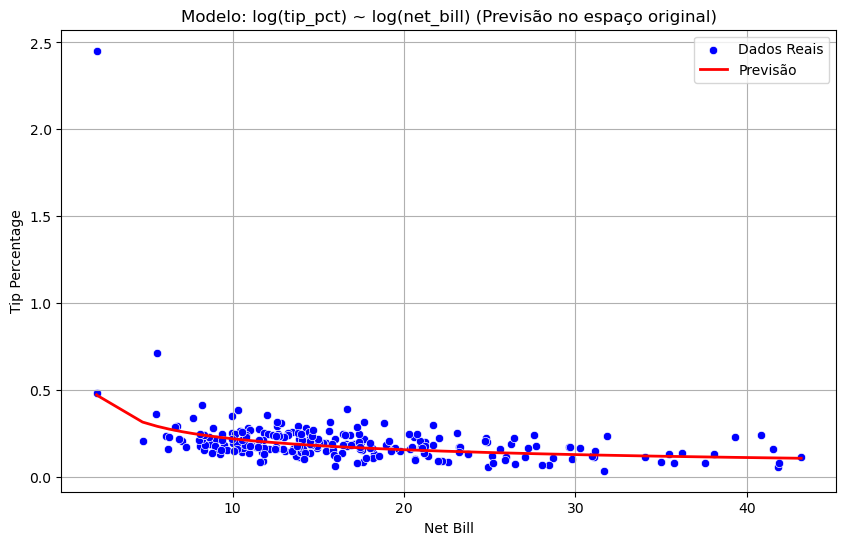

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, label='Dados Reais', color='blue')

tips_sorted = tips.sort_values('net_bill')
plt.plot(tips_sorted['net_bill'], tips_sorted['tip_pct_predicted'], color='red', label='Previsão', linewidth=2)

plt.xlabel('Net Bill')
plt.ylabel('Tip Percentage')
plt.title('Modelo: log(tip_pct) ~ log(net_bill) (Previsão no espaço original)')
plt.legend()
plt.grid(True)
plt.show()

###  6. qual modelo resultou no melhor ajuste?

Avaliando o R2 podemos ver que o melhor ajuste é calcular o R2 em tip_pct. Temos ainda alguns pontos fora mas são poucos e em sua maioria seguem a linha de previsão.
Algo a ser notdo é a linha de previvsão que engloba mais pontos, mesmo alguns dos dispersos.